# Access Control Effector - Response-Time Behavior

Before you can use this notebook, data must be prepared:
* Run ```fix-all-log-files.sh``` on the logs to fix potential newline issues with certain Kieker versions.
* Compute the response-times with ```run-all-response-time-ac-probe.sh```
* Check whether the ```data_prefix``` is set correctly.

In [12]:
data_prefix <- "data/probe-experiment-node2/exp-1"

operation_name <- 'public abstract interface void org.openqa.selenium.WebElement.click()'
task_name <- 'org.iobserve.selenium.behavior.tasks.jpetstore.account.ChangeAccountInformationTask'
#'org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask'

size=c()
mean_rst=c()
median_rst=c()
q1_rst=c()
q3_rst=c()

collected_index=c()
collected_values=c()

# read data
for (loop in c(1,2,3,4,5,6,7,8,9,
                     10,11,12,13,14,15,16,17,18,19,
                     20,30,40,50,60,70,80,90,95,
                     100,110,120,130,140,150,
                     200,300,400,
                     500,550,560,570,580,590,
                     600,
                     700,710,720,730,740,750,
                     800,
                     900,950,960,970,980,990,
                     1000,1010,1020,1030,1040,1050,
                     2000,3000,4000,5000,6000,7000,8000,9000,
                     10000)) {
    responseTimePath <- sprintf("%s/%s/response-time/response-time.csv",data_prefix, loop)

    if (file.exists(responseTimePath)) {
        if (file.size(responseTimePath) > 0) {
            print(sprintf("Reading %s ...", responseTimePath))
            input <- read.csv(responseTimePath, header=TRUE)

            clickResponseTime <- input[ which(input$operation==operation_name & input$task==task_name & input$event.type=='AfterOperationEvent'), ]
            
            size <- c(size,loop)
            mean_rst <- c(mean_rst, mean(clickResponseTime[,3]))
            median_rst <- c(median_rst, median(clickResponseTime[,3]))
            q1_rst <- c(q1_rst, quantile(clickResponseTime[,3], 0.25))
            q3_rst <- c(q3_rst, quantile(clickResponseTime[,3], 0.75))
            
            for (i in 1:length(clickResponseTime[,1])) {
                collected_index <- c(collected_index, loop)
                collected_values <- c(collected_values, clickResponseTime[i,3])
            }
        } else {
            print(sprintf("File %s is empty.", responseTimePath))
        }
    } else {
        print(sprintf("File %s is missing", responseTimePath))
    }  
}

data <- data.frame("index"=size, "mean"=mean_rst, "q1"=q1_rst, "q3"=q3_rst, "median"=median_rst, stringsAsFactors=FALSE) 
collected <- data.frame("index"=collected_index, "value"=collected_values)

[1] "Reading data/probe-experiment-node2/exp-1/1/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/2/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/3/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/4/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/5/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/6/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/7/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/8/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/9/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/10/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/11/response-time/response-time.csv ..."
[1] "Reading data/probe-experiment-node2/exp-1/12/re

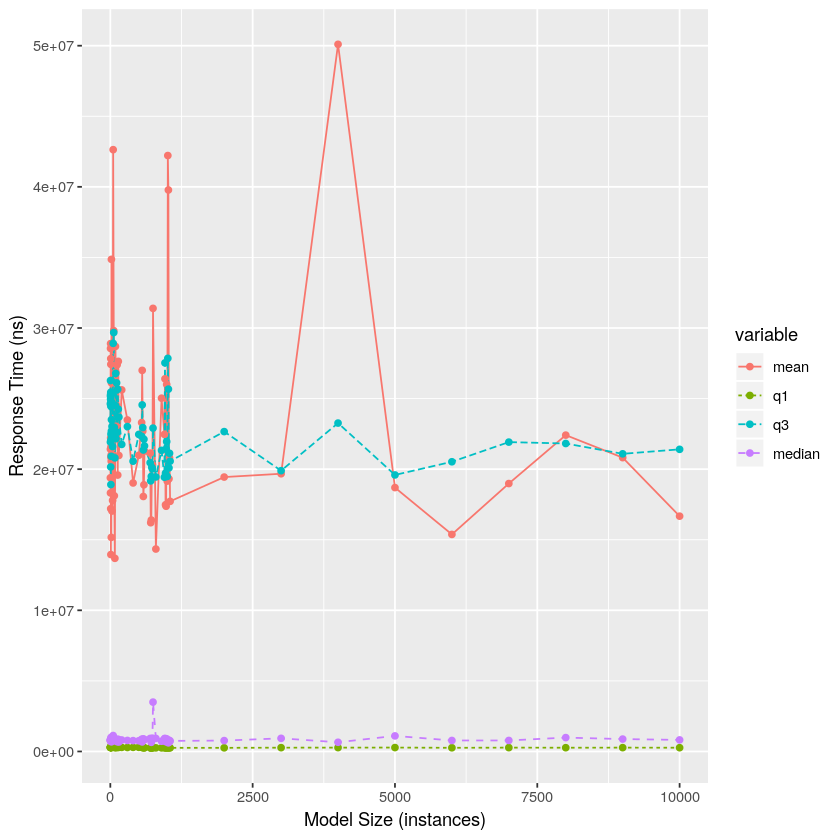

In [14]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)


allColumns <- colnames(data)

measureColumns <- allColumns[c(2,3, 4, 5)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

ggplot(ggData, aes(x=index, y=value, linetype = variable, color = variable)) + 
    geom_line() +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Response Time (ns)")
# show click, clear
#
#ggplot(data = responseTime, aes(x=operation, y=response.time)) + 
#    geom_boxplot(aes(fill=operation)) + 
#    scale_fill_discrete(name = "Functions", labels = c("clear", "click", "sendKeys")) +
#    scale_x_discrete(breaks=c("public abstract interface void org.openqa.selenium.WebElement.clear()",
#                              "public abstract interface void org.openqa.selenium.WebElement.click()",
#                              "public abstract transient interface void org.openqa.selenium.WebElement.sendKeys(java.lang.CharSequence[])"),
#        labels=c("clear", "click", "sendKeys"))

In [15]:
easureColumns <- allColumns[c(2,3, 4, 5)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

g <- ggplot(ggData, aes(x=index, y=value, linetype = variable, color = variable)) + 
    geom_line() +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Response Time (ns)") +
    theme(
        axis.title = element_text(size = 8),
        axis.text = element_text(size = 6),
        legend.text = element_text(size = 6),
        legend.title = element_text(size = 8)
    )

ggsave(g, width=123, height=50, filename="access-control-probe-performance.pdf", units="mm")

https://www.machinelearningplus.com/machine-learning/complete-introduction-linear-regression-r/

In [16]:
linearMod <- lm(index ~ median, data=data)
print(linearMod)

cor(collected$index, collected$value)


Call:
lm(formula = index ~ median, data = data)

Coefficients:
(Intercept)       median  
  9.887e+02    1.002e-04  



[1] -0.008331372

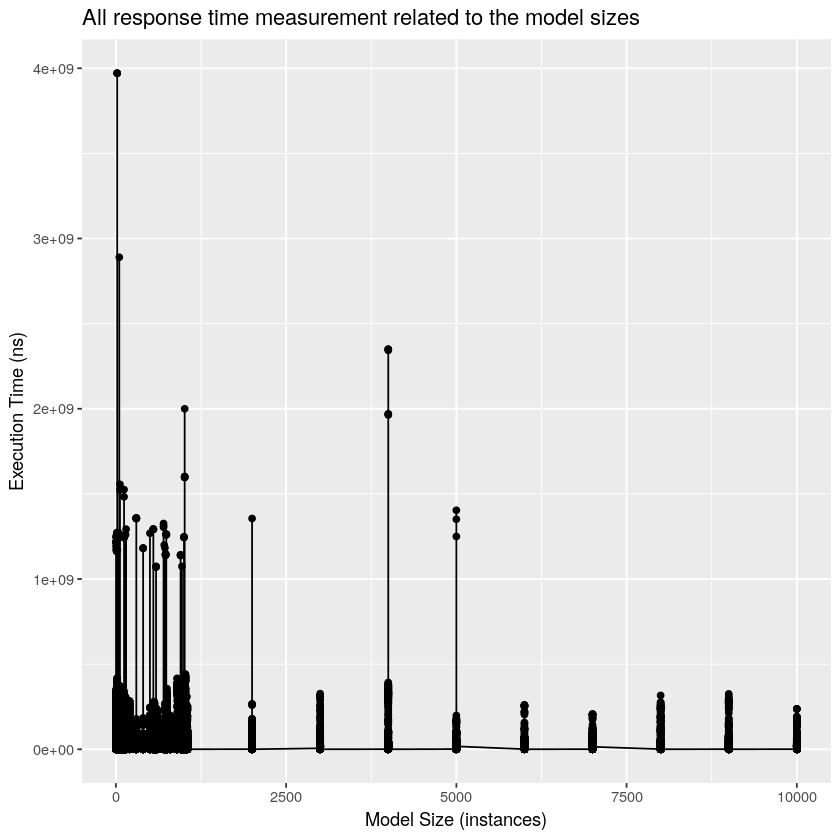

In [17]:
ggplot(collected, aes(x=collected$index, y=collected$value)) + 
    ggtitle("All response time measurement related to the model sizes") +
    geom_line() +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ns)")